## Copyright ©

Project Completed by [Tajamul Khan](https://github.com/tajamulk2)
* For More Projects like this. Check out my [GitHub](https://github.com/tajamulk2)
* Let's connect over [Linked In](https://www.linkedin.com/in/tajamulk2/)

## Support my Work

If my work benefits you, you can support me here 👇 

<a href="https://www.buymeacoffee.com/tajamulk2"><img src="https://img.buymeacoffee.com/button-api/?text=Buy me a Coffee&emoji=&slug=tajamulk2&button_colour=ffdd00&font_colour=000000&font_family=Bree&outline_colour=000000&coffee_colour=ffffff" /></a>  


*HR Analytics is defined as a specialized form of data analytics that involves usage of employee-related data and analytical processes to improve HR performance level and employee retention. The data collected is used to help the management make informed decisions with respect to attrition rates and employee retention.*

HR analytics aims at answering the following questions:

1.   What is the employee value and retention rate?
2.   What is the approximate attrition rate?
3.   How many employees deserve a promotion?
4.   What is the employee turnover rate?

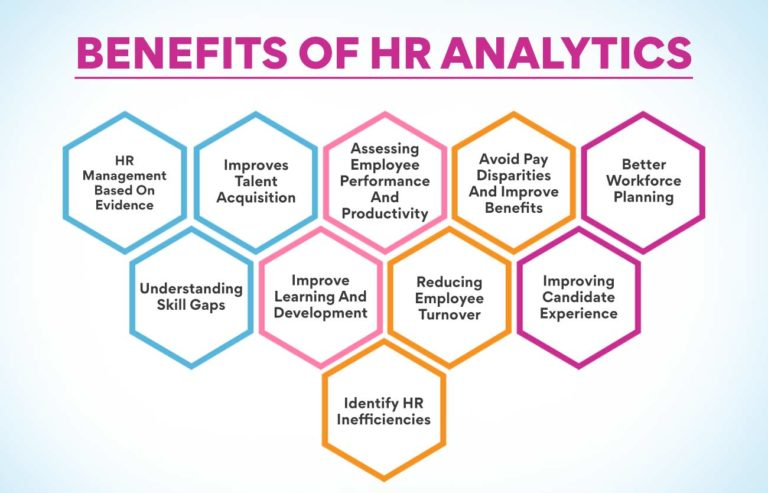

## **Problem Statement**

* Gadget Tank, a growing company is facing a high attrition rate among
their employees which in turn affects their business due to lack of expertise
and experience.
* Their HR department is assigned the task to reduce the attrition rate by
retaining employees who are about to churn out.
* They need to recommend special plans or strategies which will help them to
retain their employees which in turn will help them to grow bigger as a
company

### **Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('employees.csv')  #Importing Employees Data Set

### **Checking Data**

In [3]:
df.size   #total no. of records

149990

In [4]:
df.shape   #total no. of rows and columns

(14999, 10)

In [5]:
df.sample(5)    #Sample of DataSet

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
9981,0.78,0.93,4,225,5,0,1,0,sales,medium
1298,0.37,0.49,2,148,3,0,1,0,sales,low
7520,0.79,0.73,2,147,2,0,0,0,technical,medium
14573,0.24,0.42,5,210,5,0,0,0,accounting,low
4588,0.61,0.48,4,257,2,0,0,0,support,high


In [6]:
df.info();  #Information about Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.describe() #Statistical Summary of Data

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
df.columns  # Checking Columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

### **Data Cleaning**

In [9]:
df.rename(columns = {'timeSpent.company':'timeSpent_company'}, inplace = True)  #Renaming Column

In [10]:
df.isnull().sum()  #If Null values are present

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent_company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [11]:
df.duplicated().sum()   #Check for Duplicates

3008

In [12]:
df = df.drop_duplicates(keep='first')  #Removing Duplicates while keeping First Values

In [13]:
df.shape  #Data Reduced to 11991 items

(11991, 10)

## **Using EDA**

In [14]:
#First we will store all the independent column in a list

feature = ['dept','numberOfProjects','timeSpent_company','workAccident','promotionInLast5years','salary']

In [15]:
feature

['dept',
 'numberOfProjects',
 'timeSpent_company',
 'workAccident',
 'promotionInLast5years',
 'salary']

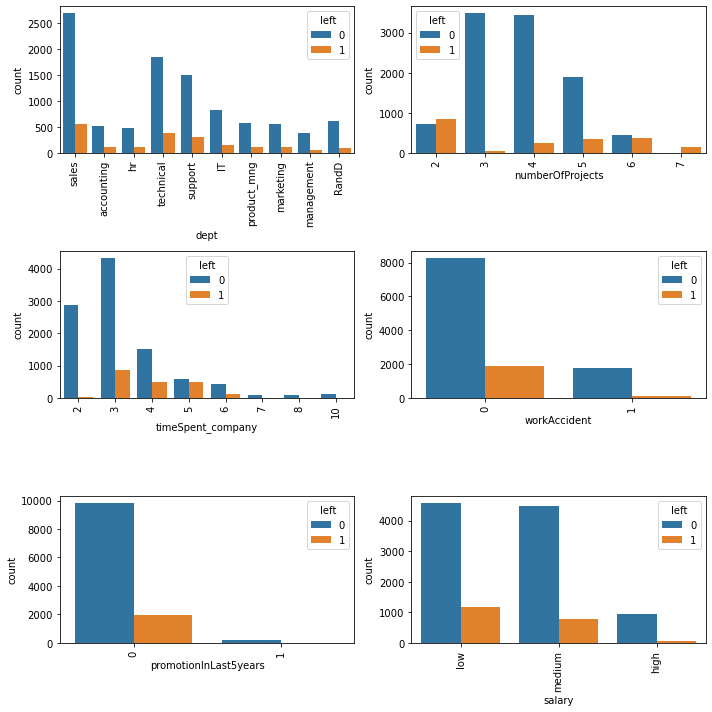

In [16]:
plt.figure(figsize=(10,10))
for p,q in enumerate(feature):
  plt.subplot(3,2,p+1)
  sns.countplot(x = q, hue = 'left', data = df)
  plt.xticks(rotation = 90)
  plt.tight_layout()

### **Conclusion Using EDA**

1. The HR has to take care of Sales, Technical, and Support departments
2. The employees having less or more project are churning out. so optimal number of project is 3
3. The 3 - 5 years is the crucial time for employee who is churning out.
4. Note: work accident vs left --- it is not giving any information about employee
5. The employee is leaving if they are not getting promoted in 5 years.
6. The person having high salary are staying with the company whereas low salary is forcing them to leave or planning to leave.

## **Using Statistical Analysis**

### **Cheking Normality Using**

1. Visualization : Histogram and Skewness
2. Shapiro Wilk Test


#### 1. **Visualization**

Check whether the data is normally distributed or not in satisfactory level column using visualization

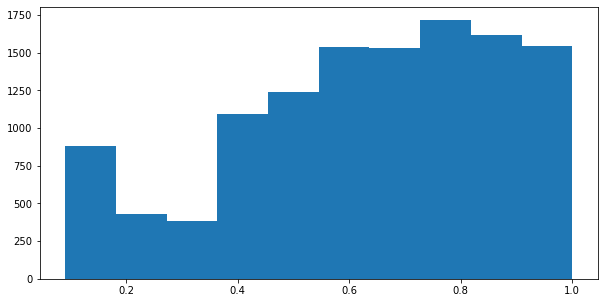

In [17]:
# plotting histogram to visualize the distribution of data
plt.figure(figsize=(10,5))
plt.hist(df["satisfactoryLevel"])
plt.show()

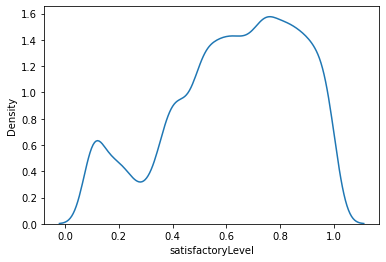

In [18]:
sns.distplot(df["satisfactoryLevel"], hist = False);

In [19]:
df['satisfactoryLevel'].skew()  #Negatively Skewed

-0.5387016649389459

 #### 2. **Using Shapiro Wilk Test**

 Check whether the data is normally distributed or not in satisfactory level column using shapiro-wilk test

In [20]:
from scipy.stats import shapiro

Hypothesis for Shapiro

1.   **Null Hypothesis (h0)** - data is normally distributed
2.   **Alternate Hypothesis (h1)** - data is not normally distributed




In [21]:
stat,p_value=shapiro(df["satisfactoryLevel"])

In [22]:
print(p_value)

0.0


In [23]:
print(stat)

0.9526869654655457


Conclusion About Normality:

Since p value is less than 0.05 reject null hypothesis, data is not normally distributed

Which Means our data is not Normally Distributed

### **Conversion of Categorical Data Using Label Encoding**

Lets Convert Salary and Department into Numerical Data

In [24]:
# salary is categorical data
df["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [25]:
# dept is also categorical data
df["dept"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'IT',
       'product_mng', 'marketing', 'management', 'RandD'], dtype=object)

In [26]:
df1=df  #copy of our dataset for further analysis

In [27]:
df1[["salary", "dept"]]

,salary,dept
0,low,sales
1,medium,sales
2,medium,sales
3,low,sales
4,low,sales
...,...,...
14992,low,hr
14995,low,sales
14996,low,technical
14997,low,sales


In [28]:
# Converting the categorical data into num, using Label Encoder
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
df1["salary"]= l1.fit_transform(df1["salary"])
df1["dept"]= l1.fit_transform(df1["dept"])

In [29]:
df1.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.37,0.52,2,159,3,0,1,0,7,1
4,0.41,0.50,2,153,3,0,1,0,7,1


## Copyright ©

Project Completed by [Tajamul Khan](https://github.com/tajamulk2)
* For More Projects like this. Check out my [GitHub](https://github.com/tajamulk2)
* Let's connect over [Linked In](https://www.linkedin.com/in/tajamulk2/)

## Support my Work

If my work benefits you, you can support me here 👇 

<a href="https://www.buymeacoffee.com/tajamulk2"><img src="https://img.buymeacoffee.com/button-api/?text=Buy me a Coffee&emoji=&slug=tajamulk2&button_colour=ffdd00&font_colour=000000&font_family=Bree&outline_colour=000000&coffee_colour=ffffff" /></a>  


### **Check for Correlation**

Correlation Graph

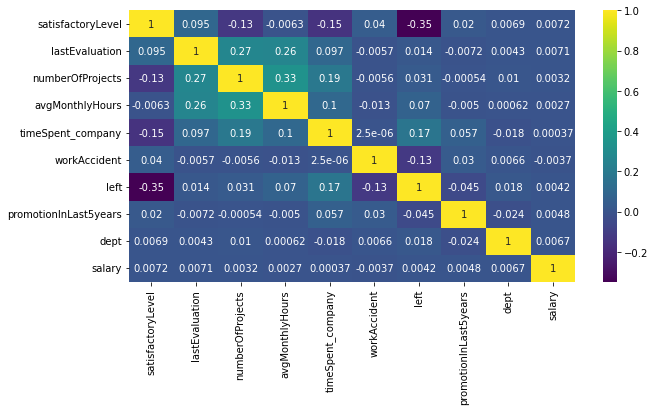

In [30]:
plt.figure(figsize = (10,5))
sns.heatmap(df1.corr(), annot=True, cmap = 'viridis');

Correlation has no enough evidence or we can say in this case is not helping us to make any inferences. So we will go with a random Experiment

###  **Descriptive statistics**

In [31]:
df.describe()  #Descriptive Analysis

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,5.871153,1.356184
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,2.899022,0.628071
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,4.000000,1.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,7.000000,1.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,8.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


### **Random Experiment**

Since we are concerned about an employee's leaving the organisation so on the basis of that we will perform a Random Experiment i.e.,



*   **Employee with satisfactoryLevel between 0 and 0.5**
    * Employees who are less satisfied are more prone to leave**
*   TimeSpent in Company == 2 Years
    * Employee with less experience often look for change
*   Average Monthly Hours Spent between 130 and 200
    * People are gullible to leave if workload is more







In [32]:
# Random experiment
emp = df[(df.satisfactoryLevel>=0)&(df.satisfactoryLevel<=0.50)&(df.timeSpent_company==2)&(df.avgMonthlyHours>=130)&(df.avgMonthlyHours<=200)]

In [33]:
emp.shape

(217, 10)

In [34]:
emp.head(3)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
35,0.13,0.78,6,152,2,0,1,0,8,1
379,0.48,0.78,2,198,2,0,1,0,9,2
413,0.34,0.67,4,141,2,0,1,0,7,1


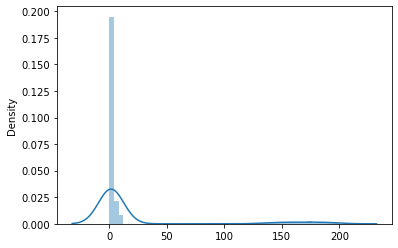

In [35]:
sns.distplot(emp);  #our sample follows normality

In [36]:
emp["left"].value_counts() #Only 6 People are leaving

0    211
1      6
Name: left, dtype: int64

In [37]:
emp["avgMonthlyHours"].mean()  #We will Test this statistic

167.2258064516129

By Looking at the above data we found out 167.225 is the average monthly hours for employee with 2 Years of Experience. We will check if it is same for people with more years of experience with the help of hypothesis testing.

We assume if People with less experience are getting to work more than people with higher work experience

## Copyright ©

Project Completed by [Tajamul Khan](https://github.com/tajamulk2)
* For More Projects like this. Check out my [GitHub](https://github.com/tajamulk2)
* Let's connect over [Linked In](https://www.linkedin.com/in/tajamulk2/)

## Support my Work

If my work benefits you, you can support me here 👇 

<a href="https://www.buymeacoffee.com/tajamulk2"><img src="https://img.buymeacoffee.com/button-api/?text=Buy me a Coffee&emoji=&slug=tajamulk2&button_colour=ffdd00&font_colour=000000&font_family=Bree&outline_colour=000000&coffee_colour=ffffff" /></a>  


## **Hypothesis Testing**

### **1. T-test**

Used for checking difference in means between samples/popluation

#### a. **One sample T-test for Mean**



It tells us whether the mean of sample and population are different or not

#### **Problem Statement**

The average monthly hours of a employee having 2 years experience is 167. Is it same for employees having more than 2 years experience?

`Condition` - Satisfactory level of a employee is from 0-0.5 and AvgMonthlyhours is from 130-200


In [38]:
employee = df[(df.satisfactoryLevel>=0)&(df.satisfactoryLevel<=0.50)&(df.timeSpent_company>=3)&(df.avgMonthlyHours>=130)&(df.avgMonthlyHours<=200)]

In [39]:
employee.head(3)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
3,0.37,0.52,2,159,3,0,1,0,7,1
4,0.41,0.50,2,153,3,0,1,0,7,1


In [40]:
employee.shape

(1462, 10)

**State Hypothesis**

In [41]:
#Null hypothesis: avg monthly hours of a employee having 2 yrs exp and the employee more than that is same i.e, 167 hrs

In [42]:
#Alternate hypothesis: avg monthly hours of a employee having 2 yrs exp doesnot have same avg monthly hours with more than 2 yrs exp employee

**Sampling**

In [43]:
# selecting a random sample
sample_size = 100
sample1 = employee.sample(sample_size,random_state=0)

**Population Parameter vs. Sample Statistic**

In [44]:
# population mean
population_mean=167

In [45]:
# sample mean
print(sample1["avgMonthlyHours"].mean())

154.2


In [46]:
from scipy.stats import ttest_1samp

**P Value Approach**

In [47]:
statistics,pvalue=ttest_1samp(sample1["avgMonthlyHours"],population_mean)
print(statistics,pvalue)

-6.812850056008294 7.534573793907689e-10


The above p-value is in Exponentials. Hence Rejecting Null Hypothesis

**Critical Value Approach**

In [48]:
# Degrees of freedom for Sample
dof=100-1
print(dof)

#degree of freedome means except for our one value ever other value is free to change

99


In [49]:
#Confidence level = 0.95
alpha= 0.05
CL = 1-alpha 

*We Can Check Critical Value Using T Student Distribution Table or Else:*

In [50]:
from scipy.stats import t

In [51]:
#Critical Value

cv= t.ppf([alpha/2, 1-alpha/2], dof)  #ppf = percent point function #Two Tailed Test
print(cv)

[-1.98421695  1.98421695]


**One Sample T-test Conclusion**

In [52]:
# p value is less than 0.05
#reject null hypothesis,

#avg monthly hours is not 167 hours for employees having more than 2 yrs of exp

### **b. One sample Z-test for Proportions**

proportion = 6/211 = 3%

#### **Problem Statement**
The percentage of employee leaving the company
is 3% having experience of 2 years. Is it
 same for employees having more than 2
years experience?

In [53]:
# Null hypothesis - percentage of employee leaving the company having the exp of 2 years is same as employee having exp more than 2 yrs
# Alternate hypothesis - percentage of employee leaving the company having the exp of 2 years is different from the employee having exp more than 2 yrs

In [54]:
from statsmodels.stats.proportion import proportions_ztest

In [55]:
employee.shape

(1462, 10)

In [56]:
sample_size=100

In [57]:
sample1=employee.sample(sample_size,random_state=0)

In [58]:
count=sample1["left"].value_counts()
count

1    63
0    37
Name: left, dtype: int64

In [59]:
nobs=len(sample1["left"])

In [60]:
nobs  #number of observations

100

In [61]:
p0 = 0.3

In [62]:
sample1["left"].value_counts()/nobs

1    0.63
0    0.37
Name: left, dtype: float64

In [63]:
statistic_oneprop,pvalue_oneprop=proportions_ztest(count=count,nobs=nobs,value=p0,alternative="two-sided",prop_var=False)

**P Value Approach**

In [64]:
print(statistic_oneprop,pvalue_oneprop)

-0.5656854249492378 0.5716076449533316


**Critical Value Approach**

In [65]:
#Critical Value

from scipy.stats import norm
cv_norm=norm.ppf([alpha/2,1-alpha/2])
print(cv_norm)

[-1.95996398  1.95996398]


**One Proportion Z-test Conclusion**

In [66]:
# p value is greater than 0.05 accept null hypothesis and reject alternate hypothesis
# percentage of employee leaving the company having the exp of 2 years is same as employee having exp more than 2 yrs

### **c. Two sample T-test for Mean**

In [67]:
# Two sample test for means - compared the means of a two independent groups

In [68]:
df1.head(3)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2


## Copyright ©

Project Completed by [Tajamul Khan](https://github.com/tajamulk2)
* For More Projects like this. Check out my [GitHub](https://github.com/tajamulk2)
* Let's connect over [Linked In](https://www.linkedin.com/in/tajamulk2/)

## Support my Work

If my work benefits you, you can support me here 👇 

<a href="https://www.buymeacoffee.com/tajamulk2"><img src="https://img.buymeacoffee.com/button-api/?text=Buy me a Coffee&emoji=&slug=tajamulk2&button_colour=ffdd00&font_colour=000000&font_family=Bree&outline_colour=000000&coffee_colour=ffffff" /></a>  


#### **Problem Statement**
Is the mean avg monthly hours of a employee having experience of 2-5 yrs is the same as that for employee having exp 6 - 10 yrs ?

In [69]:
# Null hypothesis - Means are same
# Alternate hypothesis - Means are not same

In [70]:
e1=df1[(df1.timeSpent_company>=2) & (df1.timeSpent_company<=5)]
e2=df1[(df1.timeSpent_company>=6) & (df1.timeSpent_company<=10)]

In [71]:
e1.head(2)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
2,0.11,0.88,7,272,4,0,1,0,7,2


In [72]:
e1.shape

(11167, 10)

In [73]:
e2.head(2)

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
1,0.80,0.86,5,262,6,0,1,0,7,2
13,0.78,0.99,4,255,6,0,1,0,7,1


In [74]:
e2.shape

(824, 10)

In [75]:
s1=e1.sample(200,random_state=0)
s2=e2.sample(200,random_state=0)

In [76]:
 from scipy.stats import ttest_ind

P Value Approach

In [77]:
ttest_ind(s1["avgMonthlyHours"],s2["avgMonthlyHours"])

Ttest_indResult(statistic=-0.058969634159925566, pvalue=0.9530058909644643)

Two Sample T-Test Conclusion

In [78]:
# p value > 0.05 Hence accept null hypothesis
# The mean avg monthly hours of a employee having experience of 2-5 yrs is the same as that for employee having exp 6 - 10 yrs


### **d. F-Test for Variance**


#### **Problem**
Compute the f-statistics of the previous problem statement

In [79]:
# Null hypothesis - Variances are same
# Alternate hypothesis - Variances are not same

In [80]:
# F-test for variance is used to test if the variances of two populations are equal.

In [81]:
# Sample Variance
print(s1.avgMonthlyHours.var())
print(s2.avgMonthlyHours.var())

2324.24620603015
2680.904522613066


In [82]:
# Degrees offreedom for sample
df1=len(s1)-1
df2=len(s2)-1

**P-Value Approach**

In [83]:
# Computing f statistic
from scipy.stats import f
F=s1.avgMonthlyHours.var()/s2.avgMonthlyHours.var()
print(F)

#P Value Greater than 0.05, Hence Accept Null Hypothesis

0.8669634395501401


In [84]:
import scipy.stats

**Critical Value Approach**

In [85]:
cv = scipy.stats.f.cdf(F, df1, df2) #Critical Value

In [86]:
f.ppf([alpha/2,1-alpha/2],df1, df2)

array([0.75678659, 1.32137648])

**Two Variance F-Test Conclusion**

In [87]:
# p value is >0.05, accept null hypothesis, equal variances

### **Conclusions Using Statistical Analysis**

* On the basis of one sample T-Test, we found out that average monthly hours for employees with 2 years of experience 167 hours wjile i is is not 167 hours for employees having more than 2 yrs of experience. Therefore, the reason for employees leaving might be workload due to extra working hours 

* On the basis one sample proportion test, we found out percentage of employee leaving the company having the experience of 2 years is same as employee having experience more than 2 yrs, so experience might not be an issue as we have strong issues like number of projects, promotion which may lead to high attrition

* On the basis of two sample T-Test, we found out The mean average monthly hours of an employee having experience of 2-5 yrs is the same as that for employee having exp 6 - 10 yrs but from EDA we know for employees with less than 2 Years of experience, the average monthly work hours are pretty high and add up as work stress.

## Copyright ©

Project Completed by [Tajamul Khan](https://github.com/tajamulk2)
* For More Projects like this. Check out my [GitHub](https://github.com/tajamulk2)
* Let's connect over [Linked In](https://www.linkedin.com/in/tajamulk2/)

## Support my Work

If my work benefits you, you can support me here 👇 

<a href="https://www.buymeacoffee.com/tajamulk2"><img src="https://img.buymeacoffee.com/button-api/?text=Buy me a Coffee&emoji=&slug=tajamulk2&button_colour=ffdd00&font_colour=000000&font_family=Bree&outline_colour=000000&coffee_colour=ffffff" /></a>  
